In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from publish import *

# COMPARE FED AND COMM

In [2]:
production = pd.read_csv("Datathon Data/Meat_Stats_Meat_Production.csv")

In [3]:
# Formatting the dataset, as in MeatDataScraping.ipynb
production["Production"] = production["Production"].apply(lambda x: x if type(x) == float else float(x.replace(",", "")))
production["Time"] = production["Year"] + (production["Month"] - 1) / 12

In [4]:
PRODUCTION_UNIT = "Million Pounds"

In [5]:
production = production.drop(["Date", "Year", "Month", "Unit", "Type of Meat"], axis=1)

production

,Production,Animal,Commercial or Federally Inspected,Time
0,2189.8,Beef,Commercial,2023.916667
1,2280.9,Beef,Commercial,2023.833333
2,2340.9,Beef,Commercial,2023.750000
3,2149.4,Beef,Commercial,2023.666667
4,2363.5,Beef,Commercial,2023.583333
...,...,...,...,...
13590,NaN,Turkey,Federally Inspected,1921.333333
13591,NaN,Turkey,Federally Inspected,1921.250000
13592,NaN,Turkey,Federally Inspected,1921.166667
13593,NaN,Turkey,Federally Inspected,1921.083333


In [6]:
meats = production["Animal"].unique()
production_type = production["Commercial or Federally Inspected"].unique()

meats, production_type

(array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
        'Other Chicken', 'Turkey'], dtype=object),
 array(['Commercial', 'Federally Inspected'], dtype=object))

In [8]:
production_dfs = {}

for meat in meats:
    production_dfs[meat] = {}
    for prod in production_type:
        temp_df = production[(production["Animal"] == meat) & (production["Commercial or Federally Inspected"] == prod)].reset_index().drop(["index"], axis=1)

        if len(temp_df) == 0:
            continue

        # This code block explained in MeatDataScraping.ipynb
        for i in range(1, len(temp_df) - 1):
            if temp_df.at[i, "Production"] > 2 * temp_df.at[i - 1, "Production"]:
                if pd.isnull(temp_df.at[i + 1, "Production"]) and pd.isnull(temp_df.at[i + 2, "Production"]):
                    temp_df.at[i + 2, "Production"] = temp_df.at[i, "Production"] / 3
                    temp_df.at[i + 1, "Production"] = temp_df.at[i, "Production"] / 3
                    temp_df.at[i, "Production"] /=3

        # Turkey, Federally Inspected dataset has an error
        if (meat, prod) == ("Turkey", "Federally Inspected"):
            temp_df = temp_df.drop(temp_df[temp_df["Time"] < 1940].index)

        # This information is held in the name of the dataframe
        temp_df = temp_df.drop(["Animal"], axis=1)

        production_dfs[meat][prod] = temp_df

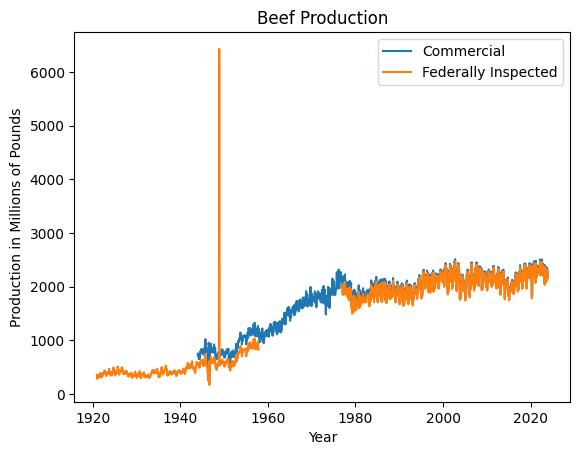

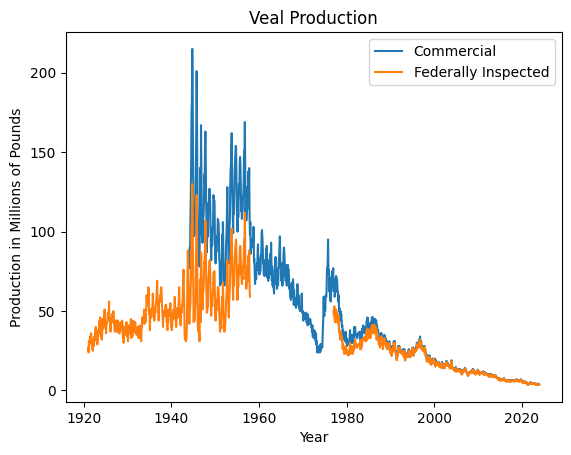

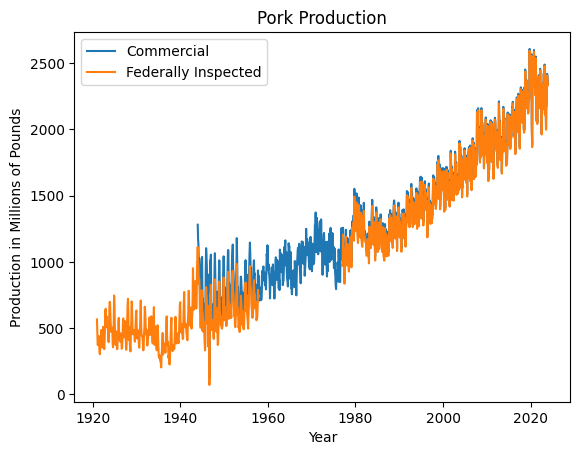

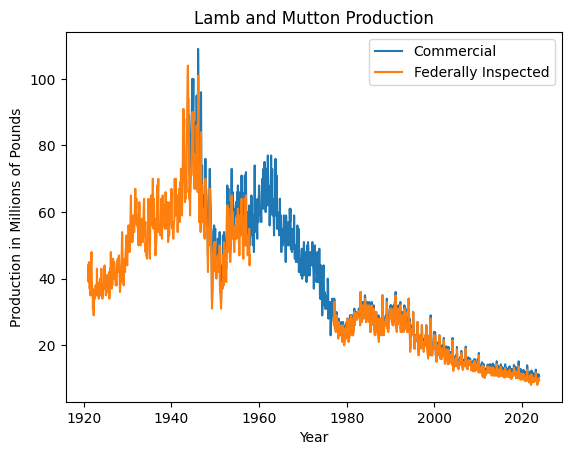

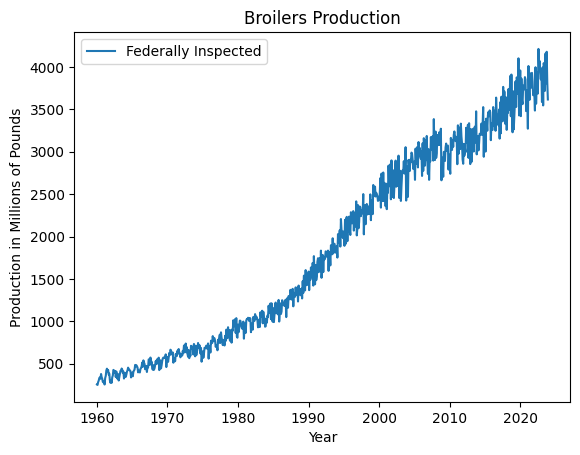

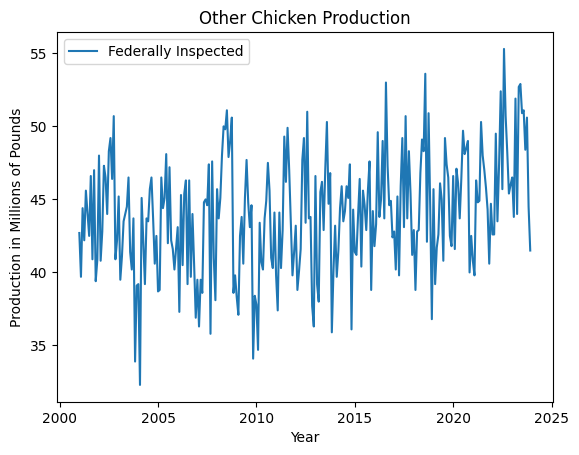

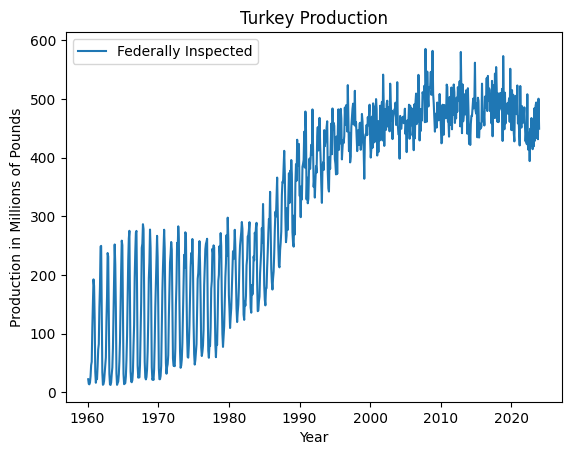

In [13]:
for meat in production_dfs:
    plt.gcf()
    for prod in production_dfs[meat]:
        df = production_dfs[meat][prod]
        plt.plot(df["Time"], df["Production"], label=df["Commercial or Federally Inspected"].values[0])
    plt.xlabel("Year")
    plt.ylabel("Production in Millions of Pounds")
    plt.title(f"{meat} Production")
    plt.legend()
    plt.show()